<a href="https://colab.research.google.com/github/shinjeongdong/MLDeeplearningStudy/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5_%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B0%81%EC%A2%85_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

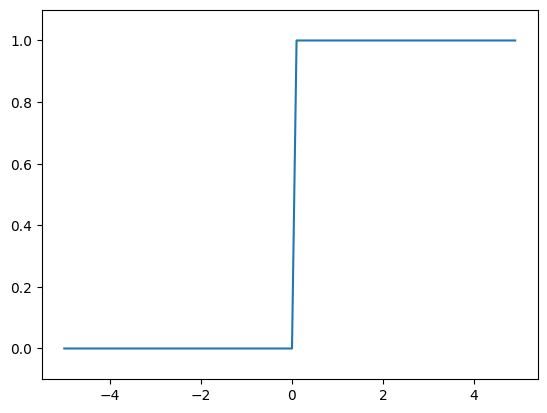

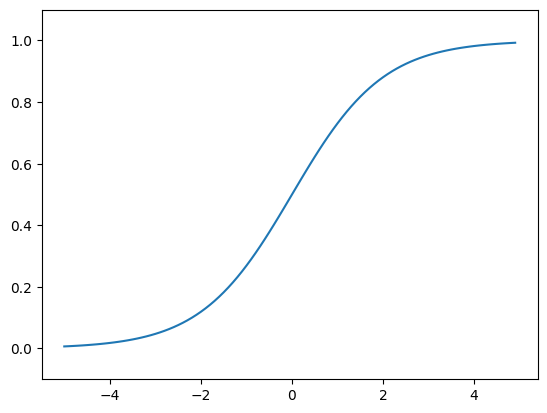

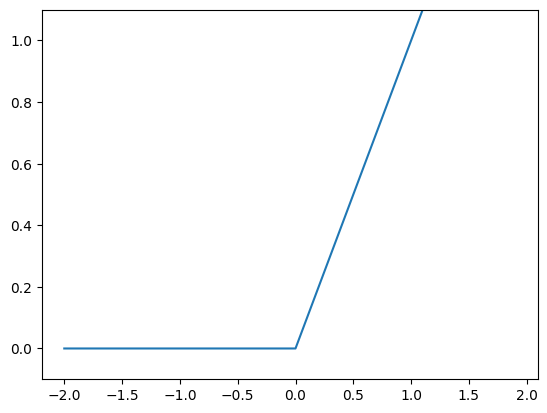

In [ ]:
import numpy as np
import matplotlib.pylab as plt
#2025-05-12 08:03

#활성화 함수쓰는이유 비선형으로 만들기 위해서 선형이면 은닉층을 많이 쌓아도 의미가 없다.
#ex h(x) = cx를 활성화 함수로 쓴다할때 3층 네트워크를 쓴다해도 y = h(h(h(x))) == y c * c * c * x == c^3*x


#계단 함수 0넘으며 1 아니면 0
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#시그모이드 s모양 함수 입력값에 따라 0~1출력
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# relu x가 0보다 크면 x출력 작으면 0출력
def relu(x):
  return np.maximum(0,x)

x = np.arange(-2.0, 2.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
#다차원 배열
#2025-05-13 14:50

import numpy as np

A = np.array([1,2,3,4])

print(np.ndim(A)) #차원 수를 알려주는 함수

print(A.shape) #행과 열을 알려주는 함수 1행4열

B = np.array([[1,2],[3,4],[5,6]]) #3행2열

print(np.ndim(B)) #차원 수를 알려주는 함수

print(B.shape)

1
(4,)
2
(3, 2)


In [ ]:
#1차원이면 벡터 2차원이면 행렬 곱을 계산함 행렬에서는 피연산자의 순서가 다르면 결과도 다르다.

#행렬의 곱 (2차원) 행렬의 곱은 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소 별로 곱한후 더한다

A = np.array([[1,2],[3,4]]) # 2차원 행렬 2 X 2

B = np.array([[5,6],[7,8]])

print(np.dot(A,B))

#행렬의 곱에서는 차원의 원소 수를 일치 시켜야된다. 3X2 2X4 두 행렬을 곱할때 앞 행렬의 열과 뒤 행렬의 행이 일치해야한다



[[19 22]
 [43 50]]


In [ ]:
#신경망에서의 행렬곱

X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W)

print(W.shape)

Y = np.dot(X,W)

print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [ ]:

#3층 신경망 구현
def identity_function(x):
  return x
# X의 각 열은 W1의 각 행과 곱한다 1.0 * 0.1 + 0.5 * 0.2 = 0.2 + B = 0.3

X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

#이렇게 나온 a값을 비선형을 위해 활성함수를 사용한다. 여기선 시그모이드 함수를 사용

Z1 = sigmoid(A1)
print(A1)
print(Z1)
#1층에서 2층으로 가는 과정은 여기서 나온 Z1의 값들을 X1값처럼 다시 입력값으로 사용한다.

W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([[0.1,0.2]])

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

#2층에서 3층

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3


#좀더 간단히 구현 정리

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network
#순방향
def forward(network,x):
  W1,W2,W3 = network['W1'],network['W2'],network['W3']
  b1,b2,b3 = network['b1'],network['b2'],network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2,W3) + b3
  y = identity_function(a3)
  return y

network = init_network()

x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[[0.51615984 1.21402696]]
[[0.62624937 0.7710107 ]]
[0.31682708 0.69627909]


In [ ]:
#출력층 설계하기
#신경망은 분류와 회귀 모두 사용이 가능하다 하지만 어떤 문제이냐에 따라서 출력층에서 사용하는 활성화 함수가 달라짐
#보통 회귀에는 항등, 분류에는 소프트 맥스 함수 사용
#softmax 함수 = yn = exp(an) / sigma(n,i=1)exp(ai)
#소프트맥스 함수 출력의 총합은 1임 고로 출력값을 확률로 해석할 수 있다.


def softmax(a):
  max = np.max(a)
  exp_a = np.exp(a - max)
  y = exp_a / np.sum(exp_a)
  return y

